Total Facebook Spend: 200319.25
Total Google Ads Spend: 237761.37000000002
Total Website Revenue: 3582533.0700000003
Total Orders: 29806


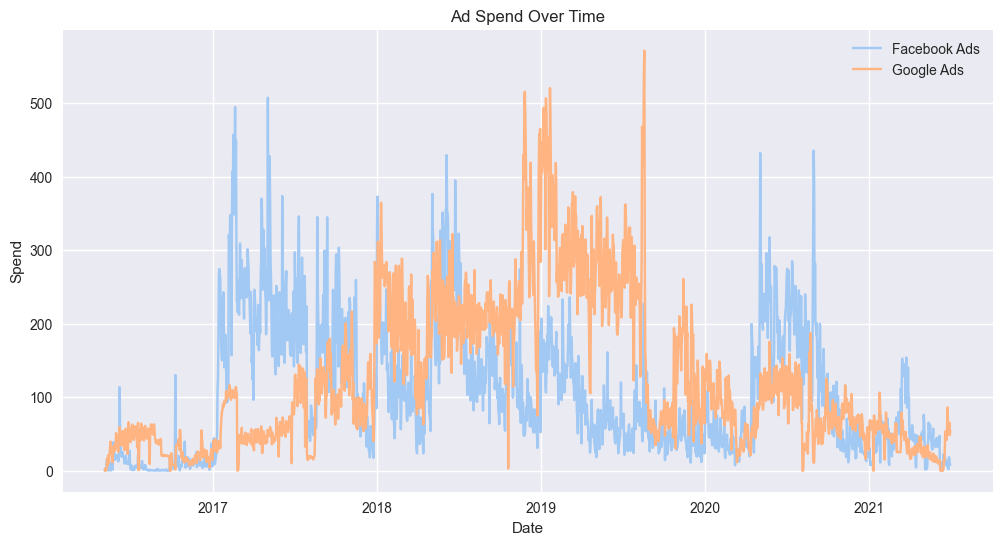

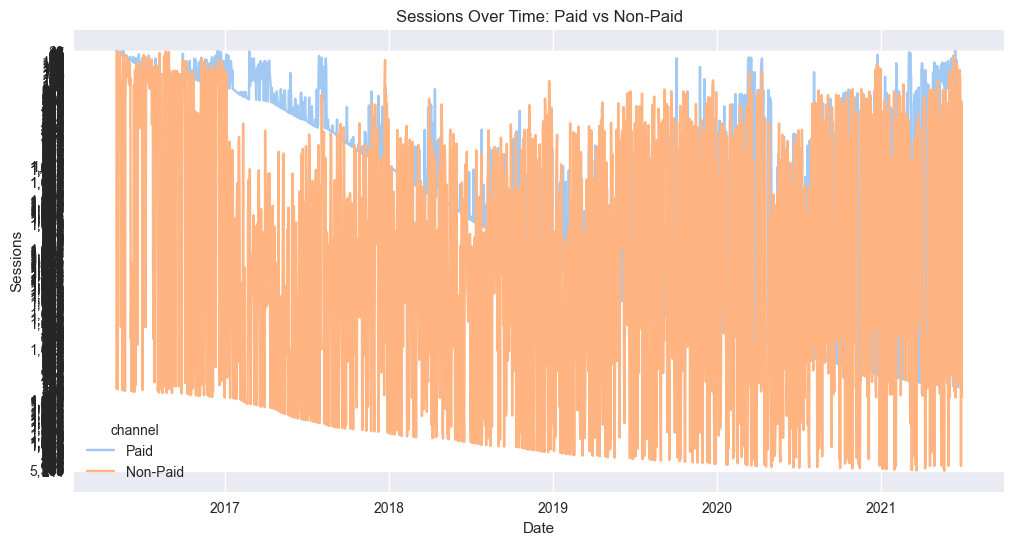

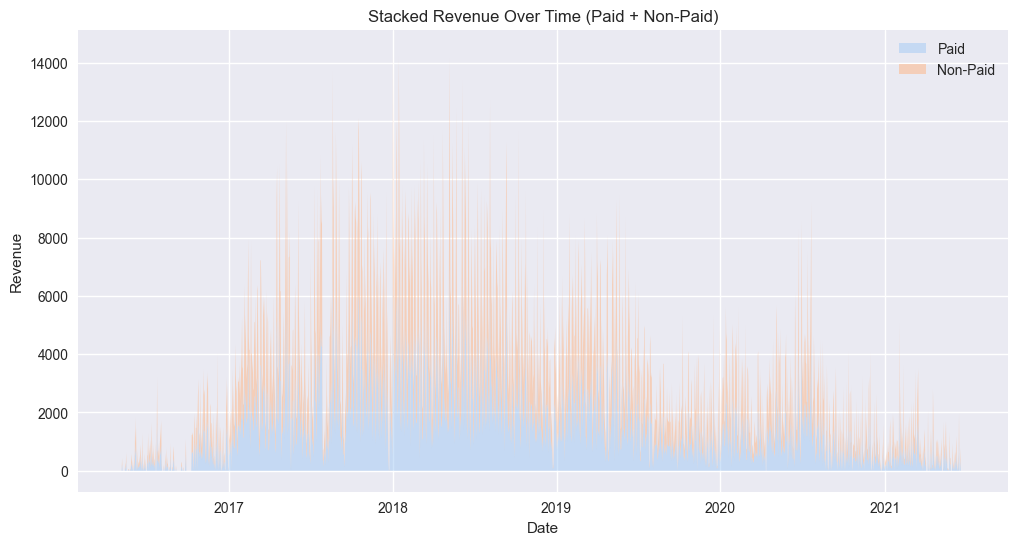


=== Channel Performance Summary ===
        Channel  Total Spend  \
0  Facebook Ads    200319.25   
1    Google Ads    237761.37   
2       GA Paid    438080.62   
3   GA Non-Paid         0.00   

                                      Total Sessions  Total Orders  \
0                                               None           NaN   
1                                               None           NaN   
2  2041154018431944422651496374416140235663474862...        5898.0   
3  2240163462694626156453653732284948247616012282...       23910.0   

   Total Revenue  
0            NaN  
1            NaN  
2     2868748.78  
3     2868748.78  


In [7]:
# ===========================================
# 📊 Marketing Data Analysis: Google Ads, Facebook Ads & GA
# ===========================================

# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 2️⃣ Load Data
fbads = pd.read_csv('C:/Users/Pc/Desktop/Python Data Analysis/fbads_daily.csv')
googleads = pd.read_csv('C:/Users/Pc/Desktop/Python Data Analysis/googleads_daily.csv')
ga_daily = pd.read_csv('C:/Users/Pc/Desktop/Python Data Analysis/ga_daily.csv')
ga_paid = pd.read_csv('C:/Users/Pc/Desktop/Python Data Analysis/ga_paid.csv')
ga_nonpaid = pd.read_csv('C:/Users/Pc/Desktop/Python Data Analysis/ga_non-paid.csv')

# 3️⃣ Data Cleaning
datasets = [fbads, googleads, ga_daily, ga_paid, ga_nonpaid]
for df in datasets:
    df.columns = df.columns.str.strip().str.lower()

# Convert date columns
fbads['data'] = pd.to_datetime(fbads['data'])
googleads['data'] = pd.to_datetime(googleads['data'])
for df in [ga_daily, ga_paid, ga_nonpaid]:
    df['date'] = pd.to_datetime(df['date'])

# 4️⃣ Explore Spend and Website Performance
total_fb_spend = fbads['cost'].sum()
total_google_spend = googleads['cost'].sum()
total_revenue = ga_daily['revenue'].sum()
total_orders = ga_daily['orders'].sum()

print(f'Total Facebook Spend: {total_fb_spend}')
print(f'Total Google Ads Spend: {total_google_spend}')
print(f'Total Website Revenue: {total_revenue}')
print(f'Total Orders: {total_orders}')

# 5️⃣ Combine Paid Ad Data
ads_spend = pd.merge(
    fbads.rename(columns={'data': 'date'}),
    googleads.rename(columns={'data': 'date'}),
    on='date', how='outer', suffixes=('_fb', '_google')
)

paid_combined = pd.merge(
    ads_spend,
    ga_paid,
    on='date', how='left'
)

# 6️⃣ Visualize Ad Spend Over Time
plt.plot(paid_combined['date'], paid_combined['cost_fb'], label='Facebook Ads')
plt.plot(paid_combined['date'], paid_combined['cost_google'], label='Google Ads')
plt.title('Ad Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.legend()
plt.show()

# ✅ Fixed Section Starts Here:
# 7️⃣ Compare Paid vs Non-Paid Traffic (Sessions + Revenue)

# Add channel labels
ga_paid['channel'] = 'Paid'
ga_nonpaid['channel'] = 'Non-Paid'

# Combine datasets for sessions and revenue
ga_combined = pd.concat([ga_paid, ga_nonpaid])

# 📈 Sessions over time
sns.lineplot(data=ga_combined, x='date', y='sessions', hue='channel')
plt.title('Sessions Over Time: Paid vs Non-Paid')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.show()



# 📈 ✅ Corrected: Total Revenue (Stacked)

# Create pivot table for revenue
revenue_pivot = ga_combined.pivot_table(index='date', columns='channel', values='revenue', aggfunc='sum').fillna(0)
revenue_pivot = revenue_pivot.sort_index()

# Plot stacked revenue
plt.figure(figsize=(12,6))
plt.fill_between(revenue_pivot.index, revenue_pivot['Paid'], alpha=0.5, label='Paid')
plt.fill_between(revenue_pivot.index, 
                 revenue_pivot['Paid'] + revenue_pivot['Non-Paid'], 
                 revenue_pivot['Paid'], alpha=0.5, label='Non-Paid')

plt.title('Stacked Revenue Over Time (Paid + Non-Paid)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# 8️⃣ Channel Performance Summary
summary = pd.DataFrame({
    'Channel': ['Facebook Ads', 'Google Ads', 'GA Paid', 'GA Non-Paid'],
    'Total Spend': [total_fb_spend, total_google_spend, total_fb_spend + total_google_spend, 0],
    'Total Sessions': [None, None, ga_paid['sessions'].sum(), ga_nonpaid['sessions'].sum()],
    'Total Orders': [None, None, ga_paid['orders'].sum(), ga_nonpaid['orders'].sum()],
    'Total Revenue': [None, None, ga_paid['revenue'].sum(), ga_nonpaid['revenue'].sum()]
})

print("\n=== Channel Performance Summary ===")
print(summary)

# 9️⃣ Save Summary to CSV (optional)
summary.to_csv('channel_performance_summary.csv', index=False)
